## Chapter 2. Diffraction concepts

## 2.1 Imaging with a lens

In this section we will explore some concepts in imaging and diffraction which hopefully will help you understand the previous part a bit better. A schematic imaging system is shown below:

<img src="Imaging.png" style="float:left; width: 700px;" >

- A planar wave illuminates an object.
- The object scatters, or diffracts, the wave. You can regard terms scattering and diffraction as synonyms throughout this tutorial.
- The lens captures a section of the scattered radiation. The larger the section, the better the final resolution of the image.
- The lens focuses the diffracted wave into an image of the object. The image is inverted, scaled and generally degraded with respect to the original.

The scattered wave contains all available structural formation about the object (up to what is called the diffraction limit, but we will look more at that later). Note that the incident wave is scattered in all directions forwards, backwards, etc. Therefore a lens placed in front of the object normally captures a rather small part of the available information.

For the imaging systems studied in this lab, we could state the imaging process in more mathematical terms like this: The scattered wave represents part of the Fourier transform of the object. The lens performs a second Fourier transform on (part of) the scattered wave. The result in the 2D case is an inverted, scaled and degraded copy of the original.

## 2.2 Imaging without a lens -- diffraction imaging

In some cases we are unable to design optics that can focus the scattered radiation with reasonable accuracy. X-rays of short wavelength, for example, are very diffcult to focus. In such a case, we must record the scattered radiation (the diffraction pattern) directly. The action of the lens (i.e. a Fourier transform) is then simulated with computer software.

A problem with this method is that we can only record the intensity of the scattered wave, not the phase. In the previous sections the phases have always been known (that is why the molecular transform has been represented by complex numbers). In reality, the phases will be lost and need to be found again before we can recover an image of the object. This step of phase retrieval is central to diffraction imaging and will be studied in a later part of the lab.

## 2.3 Some imaging theory

A single two-dimensional image contains two-dimensional information such as the surface of an object or one of its projections. A three-dimensional image, containing three dimensional information about an object, must normally be assembled from multiple two-dimensional measurements. For example, it can be based on multiple projections (like the ones you studied in the previous part). That technique is called tomography. Another widespread technique is X-ray crystallography, used for atomic-resolution imaging of crystalline samples. The diffraction patterns obtained in X-ray crystallography does not, in general, correspond to projection images of the object.

Both techniques can be viewed as special cases of a more general theory of imaging, based on the following equation which applies to two-dimensional objects as well as three-dimensional objects that are nearly transparent (the Born approximation). The electric field $\mathbf{E}$ elastically scattered by an object with scattering density $\rho$ can be approximated by the equation

$$
\mathbf{E}_{s,\infty}(\mathbf{k}_{s}, \mathbf{k}_{in}) = \int \rho (\mathbf{r})e^{-2\pi i \mathbf{r} \cdot (\mathbf{k}_{s} - \mathbf{k}_{in})} \text{d} \mathbf{r} = F(\mathbf{k}_{s}, \mathbf{k}_{in})
$$

where the subscript $\infty$ marks that the field is measured at large distance from the object (this is called the far-field approximation).

The vectors $\mathbf{k}_{in}$ and $\mathbf{k}_{s}$ are the *wave vectors* of the incident radiation and scattered radiation respectively. Wave vectors are vectors that point in the direction that the wave propagates; their length is given by the spatial frequency of the wave, which is simply the inverse of the wavelength. The equation applies to elastically scattered waves, which means that $\mathbf{k}_{in}$ and $\mathbf{k}_{s}$ have the same length.

The equation says that the scattered electric field is proportional to the Fourier transform $F$ of the object $\rho$. If we measure intensity of the wave scattered in the direction of $\mathbf{k}_{s}$, we have measured the Fourier transform of the object at coordinate $\mathbf{k} = \mathbf{k}_{s} - \mathbf{k}_{in}$. The vector $\mathbf{k}$ is called the *scattering vector*.

- Draw a vector diagram illustrating the relationship between the incident wave, the wave scattered in some direction of your choice, and the scattering vector. Let all vectors have the same origin (i.e. keep their tails together).
- If you keep the incident wave fixed and measure the scattered wave in all possible directions, the tip of scattering vector will span surface in Fourier space. What type of surface (geometrical shape)?

## 2.4 The Ewald sphere

In Python, run the function **experiment**. This shows you a planar surface, a detector with a diffraction image. Rotate the image and you will also see a curved surface that represents what the diffraction data look like in Fourier space. The arrow represents the wave vector of the incident radiation. As you see, each point on the detector is mapped to a point on a sphere in Fourier space (compare with the last question in the previous section). This sphere is usually referred to as the Ewald sphere.

In [16]:
# All functions required for Chapter 2 is contained in Diffraction.py
from Diffraction import *

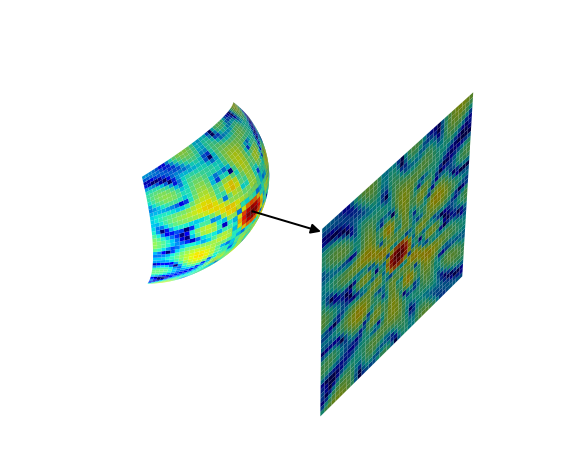

In [17]:
experiment()

You can draw an Ewald sphere with the function **ewaldsurf**, which takes a number of parameters. The first parameter is the wavelength in $\overset{\circ}{\text{A}}$, typically around 1$\overset{\circ}{\text{A}}$ for X-ray diffraction at atomic resolution. Plot the Ewald sphere for some wavelengths using **ewaldsurf(wavelength, plot=True)**. What happens to the size (radius) of the Ewald sphere as you increase/decrease the wavelength? Can you explain this in terms of the vectors you drew for the previous question?

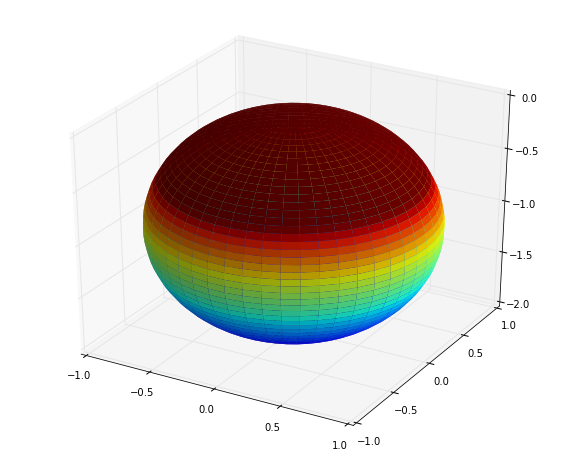

In [18]:
ewaldsurf(1, plot=True)

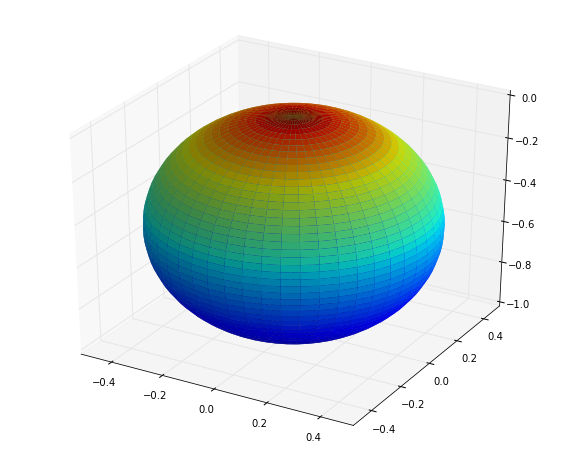

In [19]:
ewaldsurf(2, plot=True)

The second parameter of **ewaldsurf** is called the resolution. The resolution is a measure of the smallest resolvable detail in an image. Note that one would say that a resolution of 1$\overset{\circ}{\text{A}}$ is higher than a resolution of 5$\overset{\circ}{\text{A}}$, because at a resolution of 1$\overset{\circ}{\text{A}}$ you can resolve smaller details than at resolution of 5$\overset{\circ}{\text{A}}$. This is a very common source of confusion, so I will say it again: A high value of the resolution parameter corresponds to a low (poor) resolution; a low value of the resolution parameter corresponds high (good) resolution.

It gets even more confusing: in the function **ewaldsurf** the resolution parameter does not refer directly to the data in Fourier space. Instead, it refers to the extent of the Ewald sphere that is needed in order to reconstruct a real space image of the object with the given resolution. We will look a bit more at how all this works a bit later; for now you should understand that the resolution parameter is related to the maximum scattering angle for which you have recorded diffraction data. Specifically, it is the inverse of the scattering vector for the maximum scattering angle. Play around a bit with different wavelengths and resolutions, using **ewaldsurf(wavelength,resolution,plot=True)**. What happens if you decrease the resolution parameter while keeping the wavelength fixed? If you set the resolution parameter too low, you will get an error message. Can you motivate the error message?. Again, drawing a vector diagram should help.

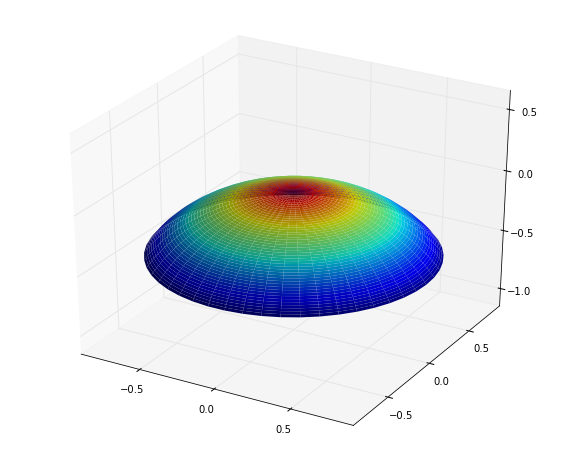

In [20]:
ewaldsurf(1, 1, plot=True)

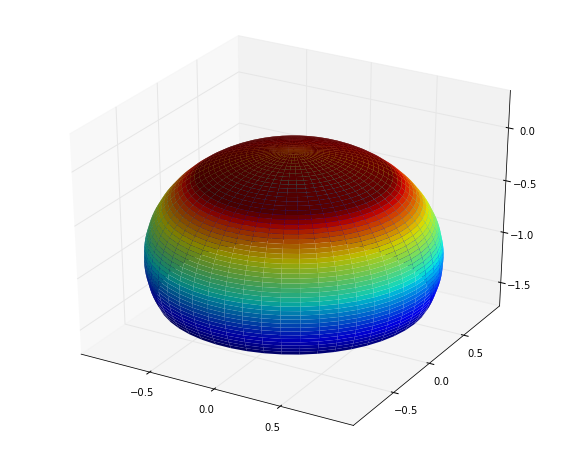

In [21]:
ewaldsurf(1, 0.6, plot=True)

In [22]:
ewaldsurf(1, 0.4, plot=True)

Resolution unachievable: resolution must be larger than lambda/2!


Try increasing/decreasing the wavelength while keeping the resolution fixed. You can plot multiple surfaces in one set of axes. How is the surface affected by the change in wavelength? In the first part of the lab you calculated projection images of a molecule, and you learned that those correspond to planar surfaces in Fourier space. To record a projection image, what requirement must you place on the wavelength relative the resolution? Electron microscopy typically produces projection images at atomic resolution. What does this say about the wavelength of the electrons used?

The Fourier transform of a single Ewald surface does not have a simple relationship to the object that is being imaged (the exception being when the surface is approximately planar so that the projection theorem applies, or when the object is two-dimensional). However, by measuring data on Ewald surfaces in a number of different orientations it is possible to sample a three-dimensional volume of Fourier space. By inverse-transforming the three-dimensional data we obtain a three-dimensional image of the object. You can visualize how multiple Ewald surfaces fills up a volume of Fourier space with the following code:

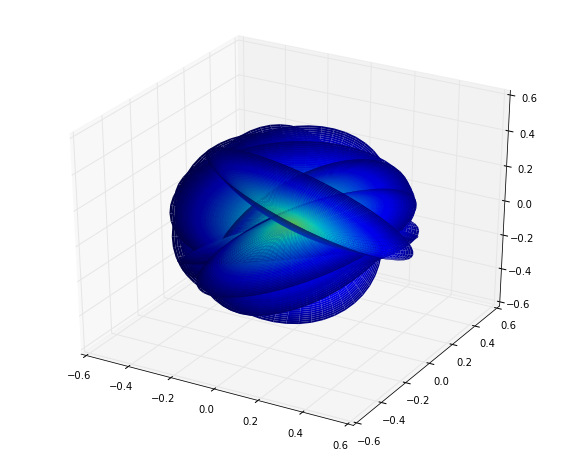

In [23]:
nViews = 10  # Number of views
res    = 2   # Resolution
lam = 1   # Wavelength
N      = 50  # Sets the sampling density in a non-obvious way.
phi   = 2*np.pi*np.random.rand(nViews)
theta = 2*np.pi*np.random.rand(nViews)
psi   = 2*np.pi*np.random.rand(nViews)
ewaldmult(lam, res, N, phi, theta, psi) # plot multiple Ewald surfaces

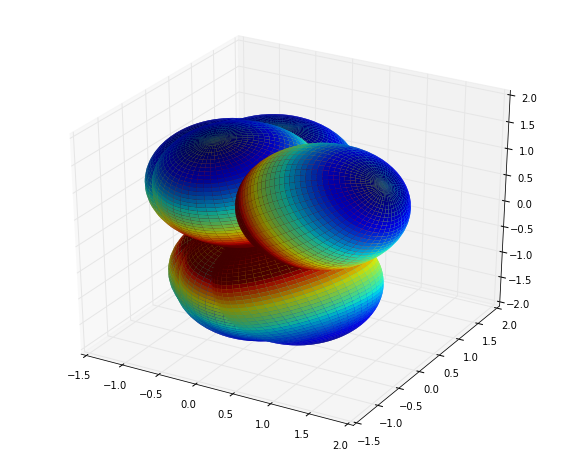

In [24]:
nViews = 10  # Number of views
res    = 0.5   # Resolution
lam = 1   # Wavelength
N      = 50  # Sets the sampling density in a non-obvious way.
phi   = 2*np.pi*np.random.rand(nViews)
theta = 2*np.pi*np.random.rand(nViews)
psi   = 2*np.pi*np.random.rand(nViews)
ewaldmult(lam, res, N, phi, theta, psi) # plot multiple Ewald surfaces

Play around a bit with different resolutions and number of views. As you can see, the further out from the origin you are, the larger the number of views needed to sample the space finely. In the following sections, you will see that the inner part of Fourier space corresponds to the large features of your object, whereas the outer parts correspond to the finer details. To obtain fine details of an object, one needs to record a large number of views.